In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('binary_classification_dataset.csv')

In [3]:
x = df.iloc[:,:-1]
y = df ['label']

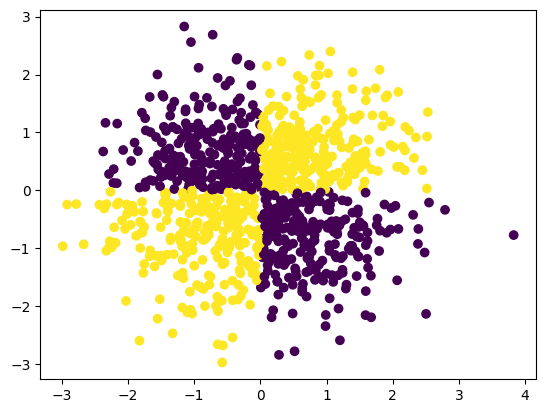

In [4]:
plt.scatter(df['feature1'],df['feature2'],c = y)
plt.show()

In [18]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense,BatchNormalization
from tensorflow.keras.models import Sequential

In [12]:
model = Sequential()
model.add(Dense(3,activation = 'relu',input_dim = 2))
model.add(Dense(2,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))
model.summary()

C:\Program Files\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20 (80.00 B)

 Trainable params: 20 (80.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
model.fit(x,y,epochs = 200,validation_split = 0.2)

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4600 - loss: 0.6444 - val_accuracy: 0.5150 - val_loss: 0.6452
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5063 - loss: 0.6353 - val_accuracy: 0.5700 - val_loss: 0.6365
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5788 - loss: 0.6280 - val_accuracy: 0.6550 - val_loss: 0.6301
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6275 - loss: 0.6228 - val_accuracy: 0.6750 - val_loss: 0.6254
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6425 - loss: 0.6187 - val_accuracy: 0.6800 - val_loss: 0.6219
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6488 - loss: 0.6155 - val_accuracy: 0.6850 - val_loss: 0.6183
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6538 - loss: 0.6124 - val_accuracy: 0.7000 - val_loss: 0.6152
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6538 - loss: 0.6096 - val_accuracy: 0.70

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

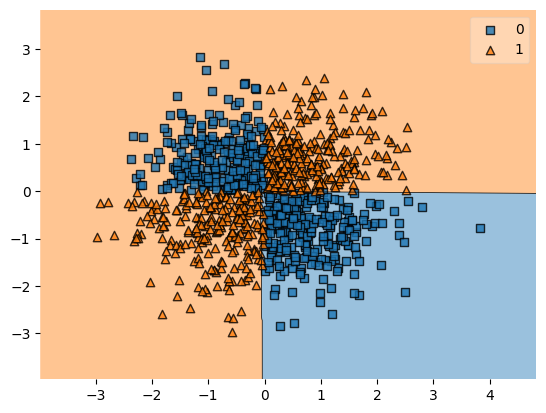

In [14]:
from mlxtend.plotting import plot_decision_regions 
plot_decision_regions(x.values,y.values.astype(int),clf=model)

In [15]:
loss,accuracy = model.evaluate(x,y) 
print("loss: " , loss) 
print("accuracy: " , accuracy)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7350 - loss: 0.3635
loss:  0.3634811043739319
accuracy:  0.7350000143051147


# Applying Batch Normalization

In [19]:
model = Sequential()
model.add(Dense(3,activation = 'relu',input_dim = 2)) # 4 * 3 = 12 parameters out of which 6 are trainable while the other 6 are non-trainable
model.add(BatchNormalization()) 
model.add(Dense(2,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation = 'sigmoid'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 3)                   │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 2)                   │               8 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 30 (120.00 B)

 Non-trainable params: 10 (40.00 B)

In [20]:
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
model.fit(x,y,epochs = 200,validation_split = 0.2)

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.5100 - loss: 0.8990 - val_accuracy: 0.6250 - val_loss: 0.6759
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5238 - loss: 0.8241 - val_accuracy: 0.6100 - val_loss: 0.6696
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5675 - loss: 0.7487 - val_accuracy: 0.6200 - val_loss: 0.6639
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5700 - loss: 0.7235 - val_accuracy: 0.6200 - val_loss: 0.6593
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5888 - loss: 0.6840 - val_accuracy: 0.6450 - val_loss: 0.6555
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6062 - loss: 0.6501 - val_accuracy: 0.6400 - val_loss: 0.6540
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6175 - loss: 0.6251 - val_accuracy: 0.6500 - val_loss: 0.6553
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6488 - loss: 0.5903 - val_accuracy: 0.6

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step


<Axes: >

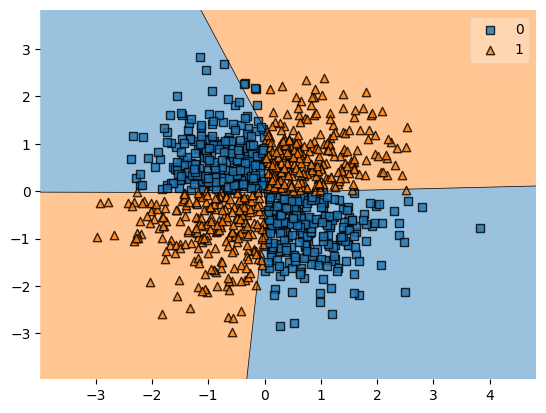

In [21]:
from mlxtend.plotting import plot_decision_regions 
plot_decision_regions(x.values,y.values.astype(int),clf=model)

In [23]:
loss,accuracy = model.evaluate(x,y) 
print("loss: " , loss) 
print("accuracy: " , accuracy)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9680 - loss: 0.1340
loss:  0.1340094953775406
accuracy:  0.9679999947547913


# Remarks
##### Batch Normalization is very much effective in improving the performance and increasing the speed of algorithm